In [1]:
# Here is where you download the csv file
# https://github.com/docketrun/Detecting-Fake-News-with-Scikit-Learn/tree/master/data
# Use Python 3

# Use Python 3
## Beginning of Notebook

In [1]:
# Importing all the libaries 
import pandas as pd
import string
#from __future__ import division
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import pylab as pl
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.metrics import confusion_matrix
import itertools
from mlxtend.plotting import plot_confusion_matrix

#from sklearn import svm
#from sklearn.model_selection import StratifiedKFold
#from nltk.tokenize import RegexpTokenizer
#import itertools
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import PassiveAggressiveClassifier
#from sklearn.naive_bayes import MultinomialNB

In [2]:
file = pd.read_csv("C:/Users/zdtra/Capstone/fake_or_real_news.csv")
file.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df = pd.DataFrame(file[["title", "text", "label"]])
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Getting the count of observations
df.shape #(Number of Observations, number of columns)

(6335, 3)

In [5]:
# Understand the composition of the label features
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

# Data Cleaning

In [6]:
#Changing labels to numeric values
clean_label = {"label": {"REAL":1, "FAKE":0}}

In [7]:
#Printing df to see if the label values have changed
df.replace(clean_label, inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [8]:
# Creating a variable to get the title feature 
d_title = (df[r'title']) #reading the raw text
d_title 

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
5                                             Tehran, USA
6       Girl Horrified At What She Watches Boyfriend D...
7                       ‘Britain’s Schindler’ Dies at 106
8       Fact check: Trump and Clinton at the 'commande...
9       Iran reportedly makes new push for uranium con...
10      With all three Clintons in Iowa, a glimpse at ...
11      Donald Trump’s Shockingly Weak Delegate Game S...
12      Strong Solar Storm, Tech Risks Today | S0 News...
13           10 Ways America Is Preparing for World War 3
14                       Trump takes on Cruz, but lightly
15                             How women lead differently
16      Shocking! Michele Obama & Hillary Caught Glamo...
17      Hillar

In [9]:
# Creating a variable to get the text feature 
d_text= (df[r'text']) #reading the raw text
d_text

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
5         \nI’m not an immigrant, but my grandparents ...
6       Share This Baylee Luciani (left), Screenshot o...
7       A Czech stockbroker who saved more than 650 Je...
8       Hillary Clinton and Donald Trump made some ina...
9       Iranian negotiators reportedly have made a las...
10      CEDAR RAPIDS, Iowa — “I had one of the most wo...
11      Donald Trump’s organizational problems have go...
12      Click Here To Learn More About Alexandra's Per...
13      October 31, 2016 at 4:52 am \nPretty factual e...
14      Killing Obama administration rules, dismantlin...
15      As more women move into high offices, they oft...
16      Shocking! Michele Obama & Hillary Caught Glamo...
17      0 \nHi

In [10]:
# Getting the number of all UPPERCASE words 
# For those rage writers
df['upper_text'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text', 'upper_text']].head(600)

,text,upper_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",38
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,3
2,U.S. Secretary of State John F. Kerry said Mon...,6
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",5
4,It's primary day in New York and front-runners...,3
5,"\nI’m not an immigrant, but my grandparents ...",98
6,"Share This Baylee Luciani (left), Screenshot o...",4
7,A Czech stockbroker who saved more than 650 Je...,2
8,Hillary Clinton and Donald Trump made some ina...,49
9,Iranian negotiators reportedly have made a las...,10


In [11]:
# Apply function to the text column and loop with the lambda function of each observation
# Lowerizing the text column/data
df.text = df.text.apply(lambda x: x.lower()) 

In [12]:
df.text = df.text.apply(lambda x: x.translate(string.punctuation))

In [13]:
df.text = df.text.apply(lambda x: x.translate(string.digits)) #not sure if this one works 

In [14]:
# Removing punctuations 

exclude = set(string.punctuation)
def remove_punctuation(x):
    """
    Helper function to remove punctuation from a string
    x: any string
    """
    try:
        x = ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    return x
# Apply the function to the DataFrame
df.textp = df.text.apply(remove_punctuation)


C:\Users\zdtra\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [15]:
# function to remove non-ASCII
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
 
df['text'] = df['text'].apply(remove_non_ascii)

In [16]:
# Printing out the length of article text 
df['length_text'] = df.text.apply(len)
df

,title,text,label,upper_text,length_text
0,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",0,38,7478
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0,3,2631
2,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1,6,2531
3,Bernie supporters on Twitter erupt in anger ag...,"kaydee king (@kaydeeking) november 9, 2016 th...",0,5,2642
4,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,1,3,1840
5,"Tehran, USA","+im not an immigrant, but my grandparents ar...",0,98,13265
6,Girl Horrified At What She Watches Boyfriend D...,"share this baylee luciani (left), screenshot o...",0,4,3146
7,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than 650 je...,1,2,779
8,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,1,49,13678
9,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,1,10,4294


In [17]:
# Printing out the length of article text 
df['length_title'] = df.title.apply(len)
df

,title,text,label,upper_text,length_text,length_title
0,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",0,38,7478,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0,3,2631,85
2,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1,6,2531,43
3,Bernie supporters on Twitter erupt in anger ag...,"kaydee king (@kaydeeking) november 9, 2016 th...",0,5,2642,84
4,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,1,3,1840,48
5,"Tehran, USA","+im not an immigrant, but my grandparents ar...",0,98,13265,11
6,Girl Horrified At What She Watches Boyfriend D...,"share this baylee luciani (left), screenshot o...",0,4,3146,73
7,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than 650 je...,1,2,779,33
8,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,1,49,13678,63
9,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,1,10,4294,71


In [18]:
df['text_remove'] = df.textp

In [19]:
df['text_remove_len'] = df.text_remove.apply(len)
df

,title,text,label,upper_text,length_text,length_title,text_remove,text_remove_len
0,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",0,38,7478,28,daniel greenfield a shillman journalism fellow...,7380
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0,3,2631,85,google pinterest digg linkedin reddit stumbleu...,2575
2,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1,6,2531,43,us secretary of state john f kerry said monday...,2484
3,Bernie supporters on Twitter erupt in anger ag...,"kaydee king (@kaydeeking) november 9, 2016 th...",0,5,2642,84,— kaydee king kaydeeking november 9 2016 the l...,2567
4,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,1,3,1840,48,its primary day in new york and frontrunners h...,1755
5,"Tehran, USA","+im not an immigrant, but my grandparents ar...",0,98,13265,11,i’m not an immigrant but my grandparents are...,12984
6,Girl Horrified At What She Watches Boyfriend D...,"share this baylee luciani (left), screenshot o...",0,4,3146,73,share this baylee luciani left screenshot of w...,3106
7,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than 650 je...,1,2,779,33,a czech stockbroker who saved more than 650 je...,769
8,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,1,49,13678,63,hillary clinton and donald trump made some ina...,13470
9,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,1,10,4294,71,iranian negotiators reportedly have made a las...,4167


In [20]:
# Printing out the length of article title 
df['length_title'] = df.title.apply(len)
df

,title,text,label,upper_text,length_text,length_title,text_remove,text_remove_len
0,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",0,38,7478,28,daniel greenfield a shillman journalism fellow...,7380
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0,3,2631,85,google pinterest digg linkedin reddit stumbleu...,2575
2,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1,6,2531,43,us secretary of state john f kerry said monday...,2484
3,Bernie supporters on Twitter erupt in anger ag...,"kaydee king (@kaydeeking) november 9, 2016 th...",0,5,2642,84,— kaydee king kaydeeking november 9 2016 the l...,2567
4,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,1,3,1840,48,its primary day in new york and frontrunners h...,1755
5,"Tehran, USA","+im not an immigrant, but my grandparents ar...",0,98,13265,11,i’m not an immigrant but my grandparents are...,12984
6,Girl Horrified At What She Watches Boyfriend D...,"share this baylee luciani (left), screenshot o...",0,4,3146,73,share this baylee luciani left screenshot of w...,3106
7,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than 650 je...,1,2,779,33,a czech stockbroker who saved more than 650 je...,769
8,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,1,49,13678,63,hillary clinton and donald trump made some ina...,13470
9,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,1,10,4294,71,iranian negotiators reportedly have made a las...,4167


In [21]:
# Getting the number of characters of the features
df['char_title'] = df['title'].str.len() ## includes spaces
df[['title', 'char_title']].head()

,title,char_title
0,You Can Smell Hillary’s Fear,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,85
2,Kerry to go to Paris in gesture of sympathy,43
3,Bernie supporters on Twitter erupt in anger ag...,84
4,The Battle of New York: Why This Primary Matters,48


In [22]:
df['char_text'] = df['text'].str.len() ## includes spaces
df[['text', 'char_text']].head()

,text,char_text
0,"daniel greenfield, a shillman journalism fello...",7478
1,google pinterest digg linkedin reddit stumbleu...,2631
2,u.s. secretary of state john f. kerry said mon...,2531
3,"kaydee king (@kaydeeking) november 9, 2016 th...",2642
4,it's primary day in new york and front-runners...,1840


In [23]:
# Calculating word count for features 
df['word_count_text'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count_text']].head()

,text,word_count_text
0,"daniel greenfield, a shillman journalism fello...",1298
1,google pinterest digg linkedin reddit stumbleu...,446
2,u.s. secretary of state john f. kerry said mon...,423
3,"kaydee king (@kaydeeking) november 9, 2016 th...",404
4,it's primary day in new york and front-runners...,307


In [24]:
df['word_count_title'] = df['title'].apply(lambda x: len(str(x).split(" ")))
df[['title','word_count_title']].head()

,title,word_count_title
0,You Can Smell Hillary’s Fear,5
1,Watch The Exact Moment Paul Ryan Committed Pol...,14
2,Kerry to go to Paris in gesture of sympathy,9
3,Bernie supporters on Twitter erupt in anger ag...,15
4,The Battle of New York: Why This Primary Matters,9


In [25]:
# Getting the number of stop words in text
stop = stopwords.words('english') #setting to stop words in English vocabulary 

df['stopwords_text'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text', 'stopwords_text']].head()

,text,stopwords_text
0,"daniel greenfield, a shillman journalism fello...",585
1,google pinterest digg linkedin reddit stumbleu...,187
2,u.s. secretary of state john f. kerry said mon...,180
3,"kaydee king (@kaydeeking) november 9, 2016 th...",139
4,it's primary day in new york and front-runners...,124


In [26]:
# Spelling 

df['text'][:5].apply(lambda x:str(TextBlob(x).correct()))

0    daniel greenfield, a tillman journalism fellow...
1    goose interest dig linked credit stumbleupon p...
2    u.s. secretary of state john f. merry said mon...
3     kaydee king (@kaydeeking) november 9, 2016 th...
4    it's primary day in new york and front-runners...
Name: text, dtype: object

In [27]:
#Work in progress
def spell_correct(word_list):
    try:
        corrected = []
        for text in word_list:
            w = text(text)
            corrected.append(w.correct())
        return corrected
    except UnicodeDecodeError:
        return None

In [28]:
# Term frequency - Term frequency is simply the ratio of the count of a word present in a sentence, 
#to the length of the sentence

freq = (df['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
freq.columns = ['text', 'freq']
freq

,text,freq
0,a,15
1,the,14
2,to,14
3,of,12
4,in,10
5,and,10
6,his,9
7,he,8
8,ryan,7
9,trump,6


In [29]:
# Sentiment Analysis 
# Polarity and Subjectvity - Analyzing the range of positive and neative sentiment 
df['text'][:6000].apply(lambda x: TextBlob(x).sentiment) 

0         (0.059594779571415055, 0.5626535717657213)
1          (0.08265232974910396, 0.5186379928315412)
2         (0.10257352941176472, 0.34877450980392155)
3          (0.06364502164502164, 0.5035627705627705)
4            (0.24659526297457332, 0.40011320097527)
5         (0.07429971856990489, 0.42115193984759197)
6          (0.06702947845804991, 0.4008695272980988)
7                     (0.03437499999999999, 0.31875)
8          (0.01340319026365538, 0.4077805742922021)
9        (0.042211550024050026, 0.38936312530062533)
10        (0.16126377410468323, 0.49339236521054713)
11         (0.08785714285714287, 0.5211904761904762)
12         (0.2466346153846154, 0.45641025641025645)
13                                      (0.04, 0.52)
14                                        (0.1, 0.3)
15         (0.1467623617123616, 0.40214750064750066)
16         (0.02953703703703704, 0.4537962962962963)
17        (0.06862121212121214, 0.25551515151515153)
18         (0.09597422097422098, 0.41201069951

In [30]:
df['sentiment_text'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['text', 'sentiment_text']].head() #pulls only the polarity. 1 - Positive (-1) Negative

,text,sentiment_text
0,"daniel greenfield, a shillman journalism fello...",0.059595
1,google pinterest digg linkedin reddit stumbleu...,0.082652
2,u.s. secretary of state john f. kerry said mon...,0.102574
3,"kaydee king (@kaydeeking) november 9, 2016 th...",0.063645
4,it's primary day in new york and front-runners...,0.246595


In [31]:
df.describe()

,label,upper_text,length_text,length_title,text_remove_len,char_title,char_text,word_count_text,word_count_title,stopwords_text,sentiment_text
count,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000,6335.000000
mean,0.500552,11.840410,4679.978690,65.277664,4566.419258,65.277664,4679.978690,765.578690,10.512707,314.139384,0.074144
std,0.500039,19.966872,5058.465704,23.733657,4945.917914,23.733657,5058.465704,845.467571,3.989700,364.383515,0.096590
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,-0.900000
25%,0.000000,3.000000,1734.000000,49.000000,1690.500000,49.000000,1734.000000,287.000000,8.000000,112.000000,0.024823
50%,1.000000,7.000000,3629.000000,64.000000,3528.000000,64.000000,3629.000000,589.000000,10.000000,236.000000,0.074306
75%,1.000000,14.000000,6156.500000,78.000000,6015.500000,78.000000,6156.500000,1007.000000,13.000000,415.000000,0.119031
max,1.000000,697.000000,114797.000000,289.000000,112276.000000,289.000000,114797.000000,20897.000000,53.000000,9680.000000,1.000000


In [32]:
# Calcualte the correlation coffecients of the features
df.corr()

,label,upper_text,length_text,length_title,text_remove_len,char_title,char_text,word_count_text,word_count_title,stopwords_text,sentiment_text
label,1.000000,-0.057652,0.115369,-0.164286,0.112030,-0.164286,0.115369,0.102360,-0.163480,0.099485,0.047007
upper_text,-0.057652,1.000000,0.742424,0.038404,0.742539,0.038404,0.742424,0.758122,0.049006,0.751488,-0.001166
length_text,0.115369,0.742424,1.000000,0.023491,0.999907,0.023491,1.000000,0.997798,0.035384,0.986868,0.018554
length_title,-0.164286,0.038404,0.023491,1.000000,0.025412,1.000000,0.023491,0.026342,0.935708,0.029038,-0.029329
text_remove_len,0.112030,0.742539,0.999907,0.025412,1.000000,0.025412,0.999907,0.997918,0.037199,0.987293,0.018081
char_title,-0.164286,0.038404,0.023491,1.000000,0.025412,1.000000,0.023491,0.026342,0.935708,0.029038,-0.029329
char_text,0.115369,0.742424,1.000000,0.023491,0.999907,0.023491,1.000000,0.997798,0.035384,0.986868,0.018554
word_count_text,0.102360,0.758122,0.997798,0.026342,0.997918,0.026342,0.997798,1.000000,0.040879,0.993499,0.019808
word_count_title,-0.163480,0.049006,0.035384,0.935708,0.037199,0.935708,0.035384,0.040879,1.000000,0.046176,-0.013498
stopwords_text,0.099485,0.751488,0.986868,0.029038,0.987293,0.029038,0.986868,0.993499,0.046176,1.000000,0.024345


# Modeling

In [33]:
# Create the model 
X = df["text"]
y = df["label"]


# Add noisy features
random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape

# Instantiate the CountVectorizer  
cv = CountVectorizer()

In [80]:
# Create a Pipeline to simplify the process to model going forward

from sklearn.pipeline import Pipeline
# text_clf = Pipeline([('vect')])

In [34]:
# Learning the vocabulary of the train set or x

cv.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
# Examine the vectorized data
cv.get_feature_names()

['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '0002',
 '000billion',
 '000employees',
 '000for',
 '000ft',
 '000jobs',
 '000judge',
 '000km',
 '000wasnt',
 '000which',
 '000x',
 '001',
 '0011',
 '002',
 '003',
 '004',
 '004s',
 '005',
 '005s',
 '006',
 '00684',
 '006s',
 '007s',
 '008',
 '008s',
 '009',
 '0099',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '011',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '02welcome',
 '03',
 '030',
 '031',
 '032',
 '0325',
 '033',
 '034',
 '035',
 '037',
 '03747',
 '039',
 '03eb',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '0509245d29',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '0640',
 '066',
 '068',
 '06pm',
 '07',
 '0700',
 '071',
 '075',
 '0750',
 '076',
 '079',
 '07dryempjx',
 '08',
 '080',
 '081',
 '082',
 '084',
 '0843',
 

In [36]:
# Transform training data into a 'document-term' matrix

simple_train_dtm = cv.transform(X)
simple_train_dtm

<6335x77158 sparse matrix of type '<class 'numpy.int64'>'
	with 2177159 stored elements in Compressed Sparse Row format>

In [37]:
# Converting from sparse matrix to dense matrix
# Sparse matrix stores only non-zero values
# Dense matrix stores values including zeros
simple_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# Examine the array of words 
matrix = pd.DataFrame(simple_train_dtm.toarray(), columns=cv.get_feature_names())
matrix

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,0002,...,zvezda,zvi,zvulun,zwanzig,zweiter,zwick,zwicker,zwischenmenschlicher,zxycmwjdxj,zyuganov
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
list(matrix.columns.values)

['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '0002',
 '000billion',
 '000employees',
 '000for',
 '000ft',
 '000jobs',
 '000judge',
 '000km',
 '000wasnt',
 '000which',
 '000x',
 '001',
 '0011',
 '002',
 '003',
 '004',
 '004s',
 '005',
 '005s',
 '006',
 '00684',
 '006s',
 '007s',
 '008',
 '008s',
 '009',
 '0099',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '011',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '02welcome',
 '03',
 '030',
 '031',
 '032',
 '0325',
 '033',
 '034',
 '035',
 '037',
 '03747',
 '039',
 '03eb',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '0509245d29',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '0640',
 '066',
 '068',
 '06pm',
 '07',
 '0700',
 '071',
 '075',
 '0750',
 '076',
 '079',
 '07dryempjx',
 '08',
 '080',
 '081',
 '082',
 '084',
 '0843',
 

In [40]:
# Splitting the dataset (df) into train and test data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [41]:
# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
cv.fit(X_train)

# 4. transform training data
X_train_dtm = cv.transform(X_train)

In [42]:
X_train_dtm = cv.fit_transform(X_train)

In [43]:
X_train_dtm

<5068x68792 sparse matrix of type '<class 'numpy.int64'>'
	with 1737802 stored elements in Compressed Sparse Row format>

In [44]:
X_test_dtm = cv.transform(X_test)
X_test_dtm


<1267x68792 sparse matrix of type '<class 'numpy.int64'>'
	with 430560 stored elements in Compressed Sparse Row format>

## Multinomial Naive Bayes


In [45]:
# Modeling 

multinb = MultinomialNB()

%time multinb.fit(X_train_dtm, y_train)

Wall time: 57.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_pred_class = multinb.predict(X_test_dtm)

In [47]:
metrics.accuracy_score(y_test, y_pred_class)

0.89344909234412

In [48]:
# Calculating precision 
average_precision = average_precision_score(y_test, y_pred_class)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.85


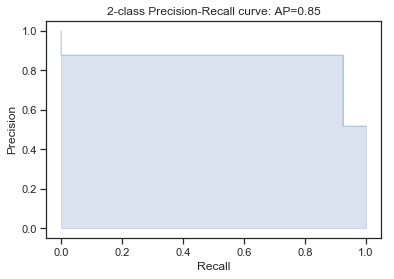

In [49]:
# Plotting Precision-Recall curve 
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_class)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [50]:
print(y_test.value_counts())
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)


1    659
0    608
Name: label, dtype: int64
Null accuracy: 1    0.520126
Name: label, dtype: float64


In [51]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[522,  86],
       [ 49, 610]], dtype=int64)

In [52]:
X_test[y_pred_class > y_test]

6321    charlie baker , massachusetts (2015present)[31...
3513    trump says he will sign very first bill to rep...
1466    abby martin exposes what hillary clinton reall...
3361    hillary reboots vast right-wing conspiracy pla...
253     trump has forever changed american politics > ...
5948    another reason as to why ryan tried to sabotag...
2267      hillary clinton appears disoriented and conf...
4881    sex and the presidential city sex and the pres...
4635    while campaigning for hillary clinton in flori...
1       google pinterest digg linkedin reddit stumbleu...
1756    breitbart  by deborah danan +tel aviv  donald ...
558     email +on monday, a man who voted for donald t...
1723    ( new york times results by county) the media ...
1151    homicides up 55 percentchicago stays vibrant >...
457     posted on november 1, 2016 by dcg | 1 comment ...
784     by jason easley   5:03 pm 370 of nation's top ...
2521    will shake things up +media ratings magnet / l...
4582    commen

In [53]:
y_pred_prob = multinb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.99994648e-01, 1.87407772e-48, 1.00000000e+00, ...,
       1.83001447e-05, 1.00000000e+00, 6.16121294e-05])

In [54]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob) #the higher the value the better the classifier

0.9272971408034502

### Comparing Model - Logistic Regression

In [55]:
logreg = LogisticRegression()

In [56]:
# Train the model 
%time logreg.fit(X_train_dtm, y_train)

C:\Users\zdtra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 2.15 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# make class predictions for X_test_dtm
y_pred_class_L = logreg.predict(X_test_dtm)

In [58]:
y_pred_prob_L = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_L

array([3.41235187e-01, 5.74329522e-08, 2.12121193e-02, ...,
       7.82868004e-02, 1.65434985e-02, 9.99881640e-01])

In [59]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class_L)

0.909234411996843

In [60]:
# calculate AUC
# Factoring the y predictions versus soley the probabilities when calculating the ROC Curve 
metrics.roc_auc_score(y_test, y_pred_prob_L)

0.9633565609775577

# Comparing Models - SVM

In [139]:
train_data = df(subset='train', shuffle=True)

TypeError: 'DataFrame' object is not callable

In [71]:
# Getting the shape of the Text feature

X_Train_counts = cv.fit_transform(X)
X_Train_counts.shape

(6335, 77158)

In [75]:
# Reference below 
#https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

#Reviewing if the shape is consistent as above 
X_Train_tfidf = tfidf_transformer.fit_transform(X_Train_counts)
X_Train_tfidf.shape

(6335, 77158)

In [89]:
# Building the Classifier 

from sklearn.linear_model import SGDClassifier

In [125]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

In [137]:
text_clf.fit(X_train).predict(X_train)

ValueError: bad input shape ()

In [128]:
len(X_train)

5068

In [95]:
from sklearn import svm

In [96]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [98]:
clf.fit(X_train_dtm, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [138]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

In [116]:
from sklearn.preprocessing import StandardScaler
# scale attributes by the training set
scl_obj = StandardScaler()
std_scl = StandardScaler()

scl_obj.fit(X_train_dtm) # find scalings for each column that make this zero mean and unit std

C:\Users\zdtra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [104]:
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 2
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

In [122]:
scaler = StandardScaler(with_mean=False) 

In [123]:
# Separating the dataset into train and test set 

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    


In [124]:
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Visualizations

In [57]:
# random forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train_dtm, y_train)

y_score_rf = rf.predict_proba(X_test_dtm)[:,-1]

C:\Users\zdtra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


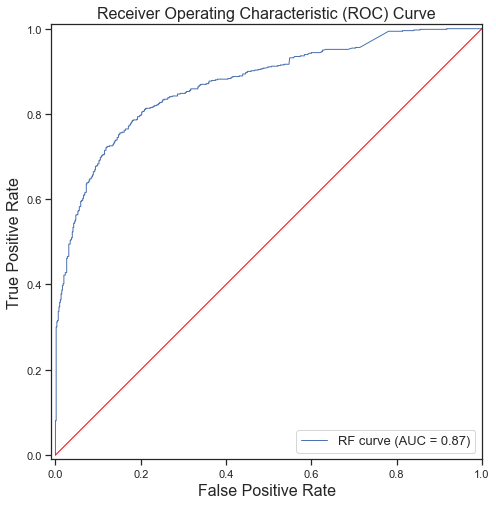

In [85]:
# Plotting AUC 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='-')
plt.axes().set_aspect('equal')
plt.show()

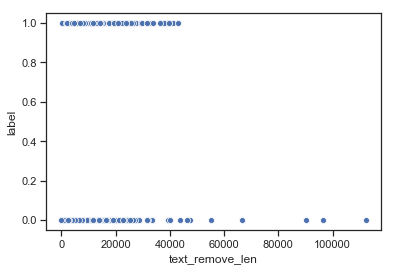

In [65]:
# do EDA here - charts, plots, NLP
sns.scatterplot(x= 'text_remove_len', y='label',data=df)
plt.show()

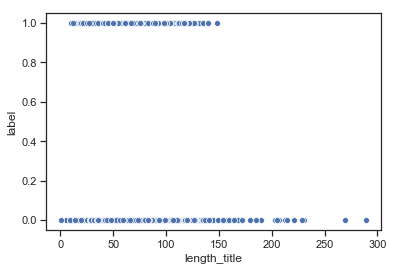

In [66]:
sns.scatterplot(x= 'length_title', y='label', data=df)
plt.show()

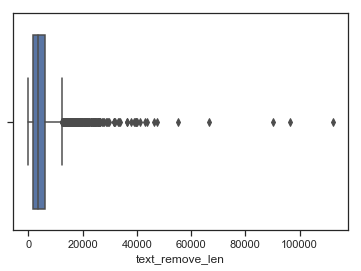

In [67]:
# Creating visualizations 
# This visualization takes a hella long time. Wait, wait, & wait 
ax = sns.boxplot(x=df["text_remove_len"])
plt.show()

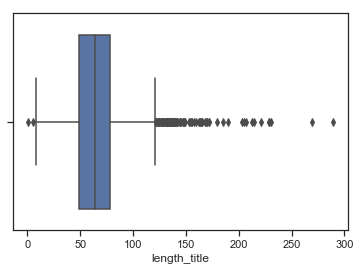

In [68]:
ax1 = sns.boxplot(x=df["length_title"])
plt.show()

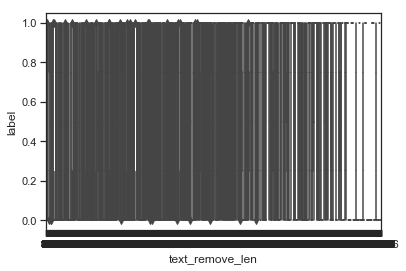

In [68]:
# Visualizing the length of the removed text feature in a box plot 
ax2 = sns.boxplot(x="text_remove_len", y="label", data=df)
plt.show()

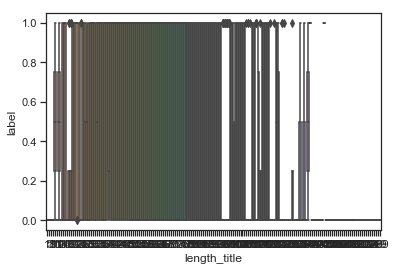

In [69]:
# Visualizing the length of the title feature in a box plot 
ax3 = sns.boxplot(x="length_title", y="label", data=df)
plt.show()

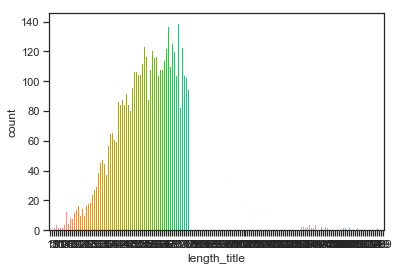

In [69]:
#Visualizing the count of the length of Title 
sns.countplot(df['length_title'],label='Count')
plt.show()

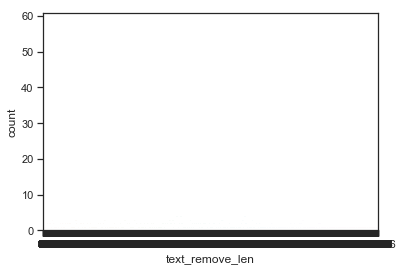

In [87]:
#Visualizing the count of the length of Title 
sns.countplot(df['text_remove_len'],label='Count')
plt.show()

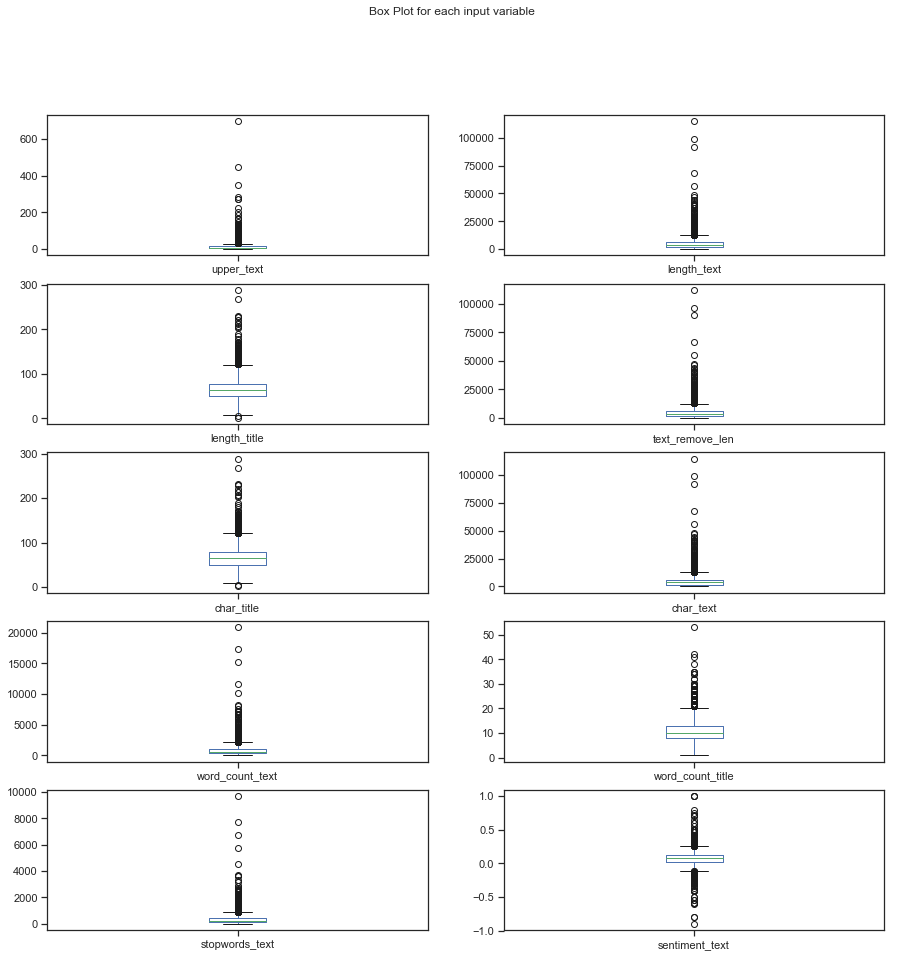

In [70]:
# Box Plot

df.drop('label', axis=1).plot(kind='box', subplots=True,
                             layout=(5,2), sharex=False, figsize=(15,15),
                             title='Box Plot for each input variable')
plt.show()

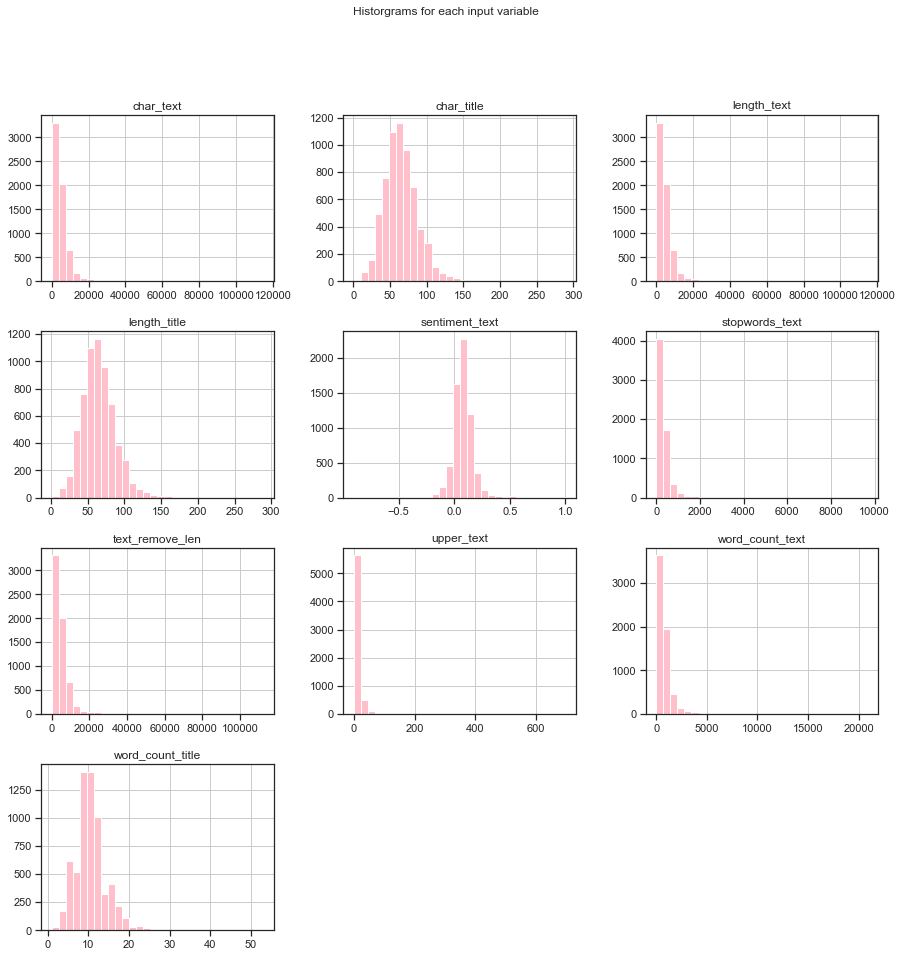

In [94]:
# Visualize Histograms of the input features 
df.drop('label', axis=1).hist(bins=30, color="pink", figsize=(15,15))
pl.suptitle("Historgrams for each input variable")
plt.show()

In [81]:
# Creating the plot confusion matrix function  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
classes_L=['Fake', 'Real']

Confusion matrix, without normalization
[[565  43]
 [ 72 587]]
Normalized confusion matrix
[[0.93 0.07]
 [0.11 0.89]]


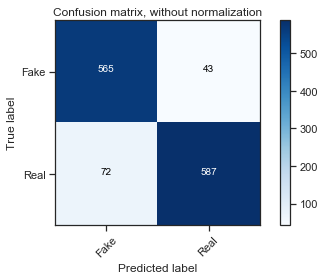

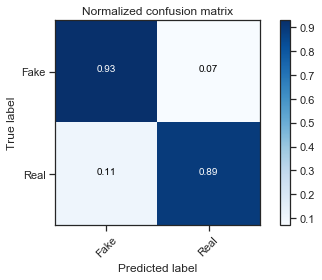

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class_L)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes_L,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes_L, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

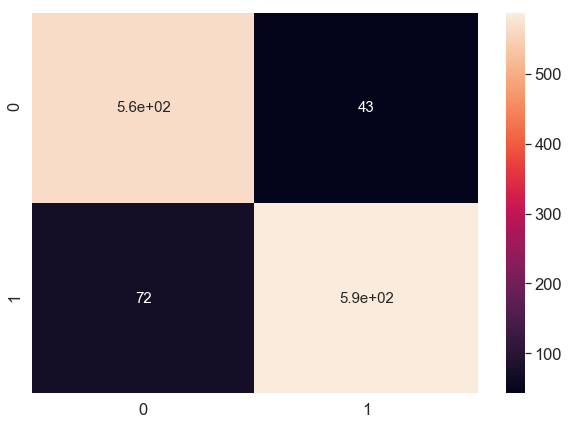

In [74]:
# Manually creating a Confusion Matrix 
array = [[565 ,43],
 [ 72, 587]]

#Passing the Number of Columns(2)
df_cm = pd.DataFrame(array, range(2),
                    range(2))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.5) #label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}) #font size

[[565  43]
 [ 72 587]]


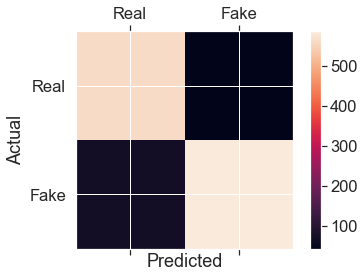

In [78]:
# Compute confusion matrix
labels = ['Real', 'Fake']
cm = confusion_matrix(y_test, y_pred_class_L)

print(cm)

# Show confusion matrix in a separate window
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)


fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Sources

#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/